# Code for Figure 4 part (a) and associated statistics reported in the text

Developed by Siobhan Powell, 2021. 

In [1]:
import os
os.chdir('../')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import pickle
import datetime

In [4]:
tmp1 = pd.read_csv('Results/NoEVs_year2035_solar3.5x_wind3x_withstorage_dpdf_20220408.csv')
tmp2 = pd.read_csv('Results/NoEVs_year2019_dpdf_20220330.csv')

In [5]:
inds = tmp1.loc[pd.to_datetime(tmp1['datetime']).dt.weekday.isin([0,1,2,3,4])].index
print('Mean day peak:, ', 10000 / tmp1.loc[inds, 'total_incl_noncombustion'].values.reshape(-1, 24).mean(axis=0).max())
print('Extreme peak:, ', 10000 / tmp1.loc[inds, 'total_incl_noncombustion'].max())

Mean day peak:,  0.09134223764530265
Extreme peak:,  0.0670442958981227


In [6]:
inds = tmp2.loc[pd.to_datetime(tmp2['datetime']).dt.weekday.isin([0,1,2,3,4])].index
print('Mean day peak:, ', 10000 / tmp2.loc[inds, 'total_incl_noncombustion'].values.reshape(-1, 24).mean(axis=0).max())
print('Extreme peak:, ', 10000 / tmp2.loc[inds, 'total_incl_noncombustion'].max())


Mean day peak:,  0.10595699566855109
Extreme peak:,  0.07777138324182234


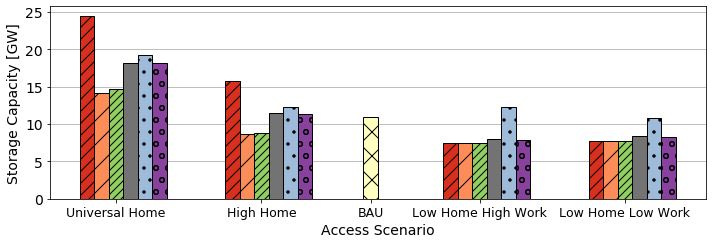

In [3]:
scens1 = ['_Timers12am_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']
vals = np.zeros((7, 5))
for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        vals[i, j] = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel1.0_storage_stats_20220408.csv')['Storage Rate Result'].values[0]
vals[6, 4] = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+'BusinessAsUsual'+'_TimersMixed_WPcontrol_minpeak'+'_penlevel1.0_storage_stats_20220408.csv')['Storage Rate Result'].values[0]
    
fig, axes = plt.subplots(1, 1, figsize=(10, 3.5))
titles=['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
control_labels = ['9pm Timers; No Work Control', '12am Timers; No Work Control', 'Random Timers; No Work Control', 'Uncontrolled', 'No Timers; Min(Peak) Work Control', 'No Timers; Max(Solar) Work Control']
hatches = ['//', '/', '///', '', '.', 'o']

# axes.axhline(10, color='k')

axes.set_xticks([0, 1, 1.75, 2.5, 3.5])
axes.set_xticklabels(labels=['Universal Home', 'High Home', 'BAU', 'Low Home High Work', 'Low Home Low Work'], fontsize=12.5)
# axes.set_title('Min Storage Needed to Support 100% EVs', fontsize=12)
axes.set_ylabel('Storage Capacity [GW]', fontsize=14)
axes.set_xlabel('Access Scenario', fontsize=14)

axes.bar(np.array([0, 1, 2.5, 3.5])-0.2, (1/1000)*vals[1, np.arange(0, 4)], 0.1, color=colors[0], label=control_labels[0], edgecolor='k', hatch=hatches[0])
axes.bar(np.array([0, 1, 2.5, 3.5])-0.1, (1/1000)*vals[0, np.arange(0, 4)], 0.1, color=colors[1], label=control_labels[1], edgecolor='k', hatch=hatches[1]) # note switched order of midnight and 9pm timers
axes.bar(np.array([0, 1, 2.5, 3.5]), (1/1000)*vals[2, np.arange(0, 4)], 0.1, color=colors[2], label=control_labels[2], edgecolor='k', hatch=hatches[2]) 
axes.bar(np.array([0, 1, 2.5, 3.5])+0.2, (1/1000)*vals[4, np.arange(0, 4)], 0.1, color=colors[4], label=control_labels[4], edgecolor='k', hatch=hatches[4])
axes.bar(np.array([0, 1, 2.5, 3.5])+0.3, (1/1000)*vals[5, np.arange(0, 4)], 0.1, color=colors[5], label=control_labels[5], edgecolor='k', hatch=hatches[5])
axes.bar(np.array([0, 1, 2.5, 3.5])+0.1, (1/1000)*vals[3, np.arange(0, 4)], 0.1, color=colors[3], edgecolor='k', label=control_labels[3], hatch=hatches[3])

axes.bar([1.75], (1/1000)*vals[6, 4], 0.1, color='#ffffbf', edgecolor='k', hatch='x', label='Business As Usual, Timers + Work Control')

edgecolors=[None, None, 'k', None, None]
legend_elements = [Patch(facecolor=colors[i], edgecolor='k', hatch=hatches[i],
                             label=control_labels[i]) for i in range(len(control_labels))]
legend_elements.append(Patch(facecolor='#ffffbf', edgecolor='k', label='Business As Usual, Timers + Work Control', hatch='x'))
axes.set_yticks(np.arange(0, 30, 5))
axes.set_yticklabels(np.arange(0, 30, 5), fontsize=14)

plt.gca().set_axisbelow(True)        
plt.grid(axis='y', which='both')

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig4a_2035_100p.pdf', bbox_inches='tight')
plt.show()

pd.DataFrame(vals, index=['_Timers12am_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'],
            columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BAU']).to_csv('MainPlotting/Tables/fig4a_2035_50p.csv')

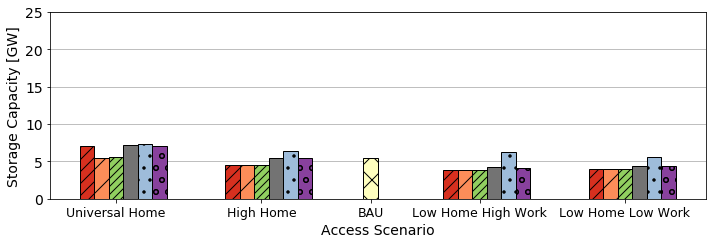

In [6]:
scens1 = ['_Timers12am_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']
vals = np.zeros((7, 5))
for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        vals[i, j] = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel0.5_storage_stats_20220408.csv')['Storage Rate Result'].values[0]
vals[6, 4] = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+'BusinessAsUsual'+'_TimersMixed_WPcontrol_minpeak'+'_penlevel0.5_storage_stats_20220408.csv')['Storage Rate Result'].values[0]
    
fig, axes = plt.subplots(1, 1, figsize=(10, 3.5))
titles=['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
control_labels = ['9pm Timers; No Work Control', '12am Timers; No Work Control', 'Random Timers; No Work Control', 'Uncontrolled', 'No Timers; Min(Peak) Work Control', 'No Timers; Max(Solar) Work Control']
hatches = ['//', '/', '///', '', '.', 'o']

# axes.axhline(10, color='k')

axes.set_xticks([0, 1, 1.75, 2.5, 3.5])
axes.set_xticklabels(labels=['Universal Home', 'High Home', 'BAU', 'Low Home High Work', 'Low Home Low Work'], fontsize=12.5)
# axes.set_title('Min Storage Needed to Support 100% EVs', fontsize=12)
axes.set_ylabel('Storage Capacity [GW]', fontsize=14)
axes.set_xlabel('Access Scenario', fontsize=14)

axes.bar(np.array([0, 1, 2.5, 3.5])-0.2, (1/1000)*vals[1, np.arange(0, 4)], 0.1, color=colors[0], label=control_labels[0], edgecolor='k', hatch=hatches[0])
axes.bar(np.array([0, 1, 2.5, 3.5])-0.1, (1/1000)*vals[0, np.arange(0, 4)], 0.1, color=colors[1], label=control_labels[1], edgecolor='k', hatch=hatches[1]) # note switched order of midnight and 9pm timers
axes.bar(np.array([0, 1, 2.5, 3.5]), (1/1000)*vals[2, np.arange(0, 4)], 0.1, color=colors[2], label=control_labels[2], edgecolor='k', hatch=hatches[2]) 
axes.bar(np.array([0, 1, 2.5, 3.5])+0.2, (1/1000)*vals[4, np.arange(0, 4)], 0.1, color=colors[4], label=control_labels[4], edgecolor='k', hatch=hatches[4])
axes.bar(np.array([0, 1, 2.5, 3.5])+0.3, (1/1000)*vals[5, np.arange(0, 4)], 0.1, color=colors[5], label=control_labels[5], edgecolor='k', hatch=hatches[5])
axes.bar(np.array([0, 1, 2.5, 3.5])+0.1, (1/1000)*vals[3, np.arange(0, 4)], 0.1, color=colors[3], edgecolor='k', label=control_labels[3], hatch=hatches[3])

axes.bar([1.75], (1/1000)*vals[6, 4], 0.1, color='#ffffbf', edgecolor='k', hatch='x', label='Business As Usual, Timers + Work Control')

edgecolors=[None, None, 'k', None, None]
legend_elements = [Patch(facecolor=colors[i], edgecolor='k', hatch=hatches[i],
                             label=control_labels[i]) for i in range(len(control_labels))]
legend_elements.append(Patch(facecolor='#ffffbf', edgecolor='k', label='Business As Usual, Timers + Work Control', hatch='x'))
axes.set_yticks(np.arange(0, 30, 5))
axes.set_yticklabels(np.arange(0, 30, 5), fontsize=14)

plt.gca().set_axisbelow(True)        
plt.grid(axis='y', which='both')

plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig4a_2035_50p.pdf', bbox_inches='tight')
plt.show()

pd.DataFrame(vals, index=['_Timers12am_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'],
            columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BAU']).to_csv('MainPlotting/Tables/fig4a_2035_50p.csv')

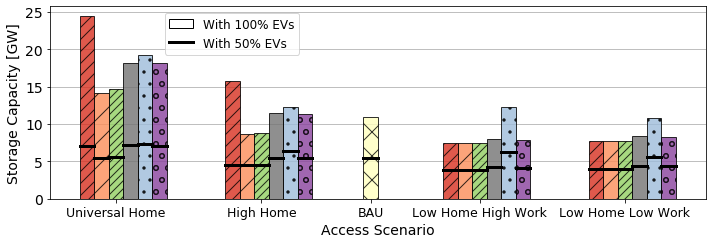

In [22]:
scens1 = ['_Timers12am_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem']
scens2 = ['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork']
vals = np.zeros((7, 5))
for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        vals[i, j] = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel1.0_storage_stats_20220408.csv')['Storage Rate Result'].values[0]
vals[6, 4] = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+'BusinessAsUsual'+'_TimersMixed_WPcontrol_minpeak'+'_penlevel1.0_storage_stats_20220408.csv')['Storage Rate Result'].values[0]
    
vals2 = np.zeros((7, 5))
for i, scen1 in enumerate(scens1):
    for j, scen2 in enumerate(scens2):
        vals2[i, j] = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+scen2+scen1+'_penlevel0.5_storage_stats_20220408.csv')['Storage Rate Result'].values[0]
vals2[6, 4] = pd.read_csv('Results/Fuel1_Solar35_Wind3/fuel1_solar3.5_wind3_'+'BusinessAsUsual'+'_TimersMixed_WPcontrol_minpeak'+'_penlevel0.5_storage_stats_20220408.csv')['Storage Rate Result'].values[0]
    
    
fig, axes = plt.subplots(1, 1, figsize=(10, 3.5))
titles=['Universal Home', 'High Home', 'Low Home High Work', 'Low Home Low Work']
colors = ['#d7301f', '#fc8d59', '#91cf60', '#737373', '#9ebcda', '#88419d']
control_labels = ['9pm Timers; No Work Control', '12am Timers; No Work Control', 'Random Timers; No Work Control', 'Uncontrolled', 'No Timers; Min(Peak) Work Control', 'No Timers; Max(Solar) Work Control']
hatches = ['//', '/', '///', '', '.', 'o']

# axes.axhline(10, color='k')

axes.set_xticks([0, 1, 1.75, 2.5, 3.5])
axes.set_xticklabels(labels=['Universal Home', 'High Home', 'BAU', 'Low Home High Work', 'Low Home Low Work'], fontsize=12.5)
# axes.set_title('Min Storage Needed to Support 100% EVs', fontsize=12)
axes.set_ylabel('Storage Capacity [GW]', fontsize=14)
axes.set_xlabel('Access Scenario', fontsize=14)

alpha=0.8

axes.bar(np.array([0, 1, 2.5, 3.5])-0.2, (1/1000)*vals[1, np.arange(0, 4)], 0.1, color=colors[0], label=control_labels[0], edgecolor='k', hatch=hatches[0], alpha=alpha)
axes.bar(np.array([0, 1, 2.5, 3.5])-0.1, (1/1000)*vals[0, np.arange(0, 4)], 0.1, color=colors[1], label=control_labels[1], edgecolor='k', hatch=hatches[1], alpha=alpha) # note switched order of midnight and 9pm timers
axes.bar(np.array([0, 1, 2.5, 3.5]), (1/1000)*vals[2, np.arange(0, 4)], 0.1, color=colors[2], label=control_labels[2], edgecolor='k', hatch=hatches[2], alpha=alpha) 
axes.bar(np.array([0, 1, 2.5, 3.5])+0.2, (1/1000)*vals[4, np.arange(0, 4)], 0.1, color=colors[4], label=control_labels[4], edgecolor='k', hatch=hatches[4], alpha=alpha)
axes.bar(np.array([0, 1, 2.5, 3.5])+0.3, (1/1000)*vals[5, np.arange(0, 4)], 0.1, color=colors[5], label=control_labels[5], edgecolor='k', hatch=hatches[5], alpha=alpha)
axes.bar(np.array([0, 1, 2.5, 3.5])+0.1, (1/1000)*vals[3, np.arange(0, 4)], 0.1, color=colors[3], edgecolor='k', label=control_labels[3], hatch=hatches[3], alpha=alpha)

axes.bar([1.75], (1/1000)*vals[6, 4], 0.1, color='#ffffbf', edgecolor='k', hatch='x', label='Business As Usual, Timers + Work Control', alpha=alpha)


shifts = [0, 1, 2.5, 3.5]
shifts2 = [-0.2, -0.1, 0, 0.2, 0.3, 0.1]
for j, key in enumerate([1, 0, 2, 4, 5, 3]):
    for i in range(4):
        axes.plot([shifts[i]+shifts2[j]-(0.1/2), shifts[i]+shifts2[j]+(0.1/2)], [(1/1000)*vals2[key, i], (1/1000)*vals2[key, i]], color='k', linewidth=3)
axes.plot([1.75-0.05, 1.75+0.05], [(1/1000)*vals2[6, 4], (1/1000)*vals2[6, 4]], color='k', linewidth=3)


edgecolors=[None, None, 'k', None, None]
legend_elements = [Patch(facecolor=colors[i], edgecolor='k', hatch=hatches[i],
                             label=control_labels[i]) for i in range(len(control_labels))]
legend_elements.append(Patch(facecolor='#ffffbf', edgecolor='k', label='Business As Usual, Timers + Work Control', hatch='x'))
axes.set_yticks(np.arange(0, 30, 5))
axes.set_yticklabels(np.arange(0, 30, 5), fontsize=14)

legend_elements=[Patch(facecolor='white', edgecolor='k', label='With 100% EVs'),
                 Line2D([0], [0], color='k', lw=3,label='With 50% EVs')]
axes.legend(handles=legend_elements, fontsize=12, loc=(0.175, 0.75))


plt.gca().set_axisbelow(True)        
plt.grid(axis='y', which='both')


plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig4a_2035_50and100p.pdf', bbox_inches='tight')
plt.show()

# pd.DataFrame(vals, index=['_Timers12am_noWPcontrol', '_Timers9pm_noWPcontrol', '_TimersRandom_noWPcontrol', '_TimersNone_noWPcontrol', '_TimersNone_WPcontrol_minpeak', '_TimersNone_WPcontrol_avgem', '_TimersMixed_WPcontrol_minpeak'],
#             columns=['UniversalHome', 'HighHome', 'LowHome_HighWork', 'LowHome_LowWork', 'BAU']).to_csv('MainPlotting/Tables/fig4a_2035_50p.csv')

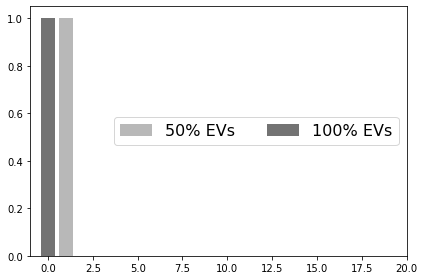

In [27]:
plt.figure()
plt.bar([1], [1], color='#737373', alpha=0.5, label='50% EVs')
plt.bar([0], [1], color='#737373', alpha=1, label='100% EVs')
plt.xlim([-1, 20])
plt.legend(fontsize=16, loc='right', ncol=2)
plt.tight_layout()
plt.savefig('MainPlotting/Plots/fig4_legend_50vs100.pdf', bbox_inches='tight')
plt.show()